# ASSIGNMENT - 3

## Build a Convolutional Neural Network Model for classification of flowers

### 1. Import the necessary libraries

In [7]:
import splitfolders
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

### 2. Download the dataset and perform image augmentation

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
input_folder = 'C:\\Users\\NITHYANANDAM\\Downloads\\flowers'

In [13]:
splitfolders.ratio(input_folder,output="C:\\Users\\NITHYANANDAM\\Downloads\\flowers\\flowersdataset",ratio=(.8,0,.2),group_prefix=None)

Copying files: 4317 files [00:09, 454.94 files/s]


In [15]:
x_train=train_datagen.flow_from_directory(r"C:\Users\NITHYANANDAM\Downloads\flowers\flowersdataset\train",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 3452 images belonging to 5 classes.


In [16]:
x_test=test_datagen.flow_from_directory(r"C:\Users\NITHYANANDAM\Downloads\flowers\flowersdataset\test",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 865 images belonging to 5 classes.


In [17]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

### 3. Create the model

### Model should contain a Convolution Layer, MaxPooling Layer, Flatten Layer, Dense Layer and Output layer

In [18]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
Total params: 9,271,946
Trainable params: 9,271,946
Non-trainable params: 0
______________________________________________

In [20]:
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 5)                 755       
                                                        

### 4. Compile the model and train it for 20 epochs using model.fit() method

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

144

In [22]:
epoch=20
history = model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=epoch)

Epoch 1/20
144/144 [==============================] - 64s 434ms/step - loss: 1.4095 - accuracy: 0.4487 - val_loss: 1.2071 - val_accuracy: 0.5098
Epoch 2/20
144/144 [==============================] - 31s 216ms/step - loss: 1.0856 - accuracy: 0.5603 - val_loss: 1.0845 - val_accuracy: 0.5780
Epoch 3/20
144/144 [==============================] - 34s 235ms/step - loss: 1.0036 - accuracy: 0.6025 - val_loss: 1.0792 - val_accuracy: 0.5561
Epoch 4/20
144/144 [==============================] - 32s 222ms/step - loss: 0.9185 - accuracy: 0.6390 - val_loss: 1.1551 - val_accuracy: 0.5503
Epoch 5/20
144/144 [==============================] - 32s 220ms/step - loss: 0.8712 - accuracy: 0.6553 - val_loss: 1.0397 - val_accuracy: 0.6405
Epoch 6/20
144/144 [==============================] - 31s 219ms/step - loss: 0.8053 - accuracy: 0.6845 - val_loss: 1.0867 - val_accuracy: 0.6023
Epoch 7/20
144/144 [==============================] - 32s 219ms/step - loss: 0.7802 - accuracy: 0.6976 - val_loss: 0.9279 - val_ac

### 5. Plot the training and validation accuracy along with training and validation loss

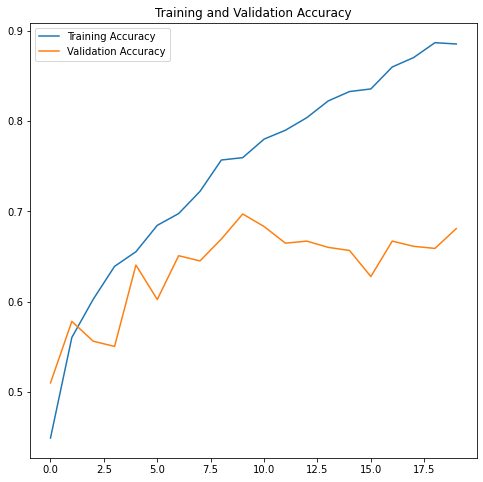

In [23]:
epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

### 6. Save the Model

In [24]:
model.save('flowers.h5')

### 7. Test the model

In [25]:
img_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
img_path = tf.keras.utils.get_file('Red_sunflower', origin=img_url)

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)
model = tf.keras.applications.resnet50.ResNet50()
prediction = model.predict(img_preprocessed)

print(decode_predictions(prediction, top=3)[0])

score = tf.nn.softmax(prediction[0])

35363/35363 [==============================] - 0s 0us/step
[('n11939491', 'daisy', 0.57757616), ('n02206856', 'bee', 0.249383), ('n03991062', 'pot', 0.01181932)]
